In [90]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt  
import json 
import requests
#import overpy
from tqdm import tqdm
from multiprocessing.dummy import Pool
import seaborn as sns
import re
from matplotlib.pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import tree
from __future__ import print_function
import sys
import datetime
import scipy as sp
# import more packages
#!pip install ax-platform
#https://ax.dev/docs/installation.html
from ax.service.ax_client import AxClient
from ax.utils.notebook.plotting import render, init_notebook_plotting
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
base_train = pd.read_csv('base_train.csv', sep ='|')
base_train

In [ ]:
base_train.info()

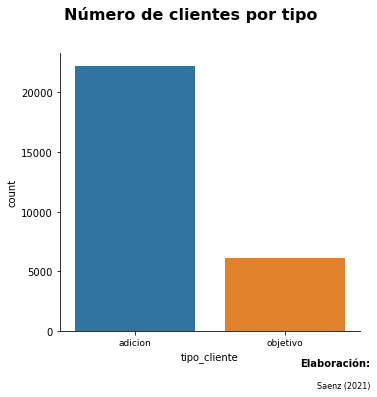

In [70]:
g = sns.catplot(x = "tipo_cliente", kind = "count", data = base_train)
g.fig.suptitle("Número de clientes por tipo", fontsize = 16, fontweight = "bold")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.subplots_adjust(top=0.85)
g.fig.text(1,-.02, "Elaboración:", fontsize = 10, fontweight = "bold", ha = "right")
g.fig.text(1,-.08, "Saenz (2021)", fontsize = 8, ha = "right")
plt.show()

In [ ]:
base_train_objetivo = base_train.loc[(base_train['tipo_cliente']=='objetivo')]
base_train_objetivo

In [ ]:
base_train_adicion = base_train.loc[(base_train['tipo_cliente']=='adicion')]
base_train_adicion

In [ ]:
base_train_objetivo.describe()

In [ ]:
base_train_adicion.describe()

In [ ]:
base_train_objetivo.drop('tipo_cliente', inplace=True, axis=1)
base_train_objetivo.drop('num_doc', inplace=True, axis=1)
base_train_objetivo.info()

In [ ]:
g = sns.pairplot(base_train_objetivo.iloc[:,0:27], 
                               plot_kws = {"color": "darkblue"}, diag_kws = {"color":"darkblue"})
g.fig.suptitle("Relación entre pares de variables", fontsize = 26, fontweight = "bold")
plt.subplots_adjust(top=0.9)
plt.show()

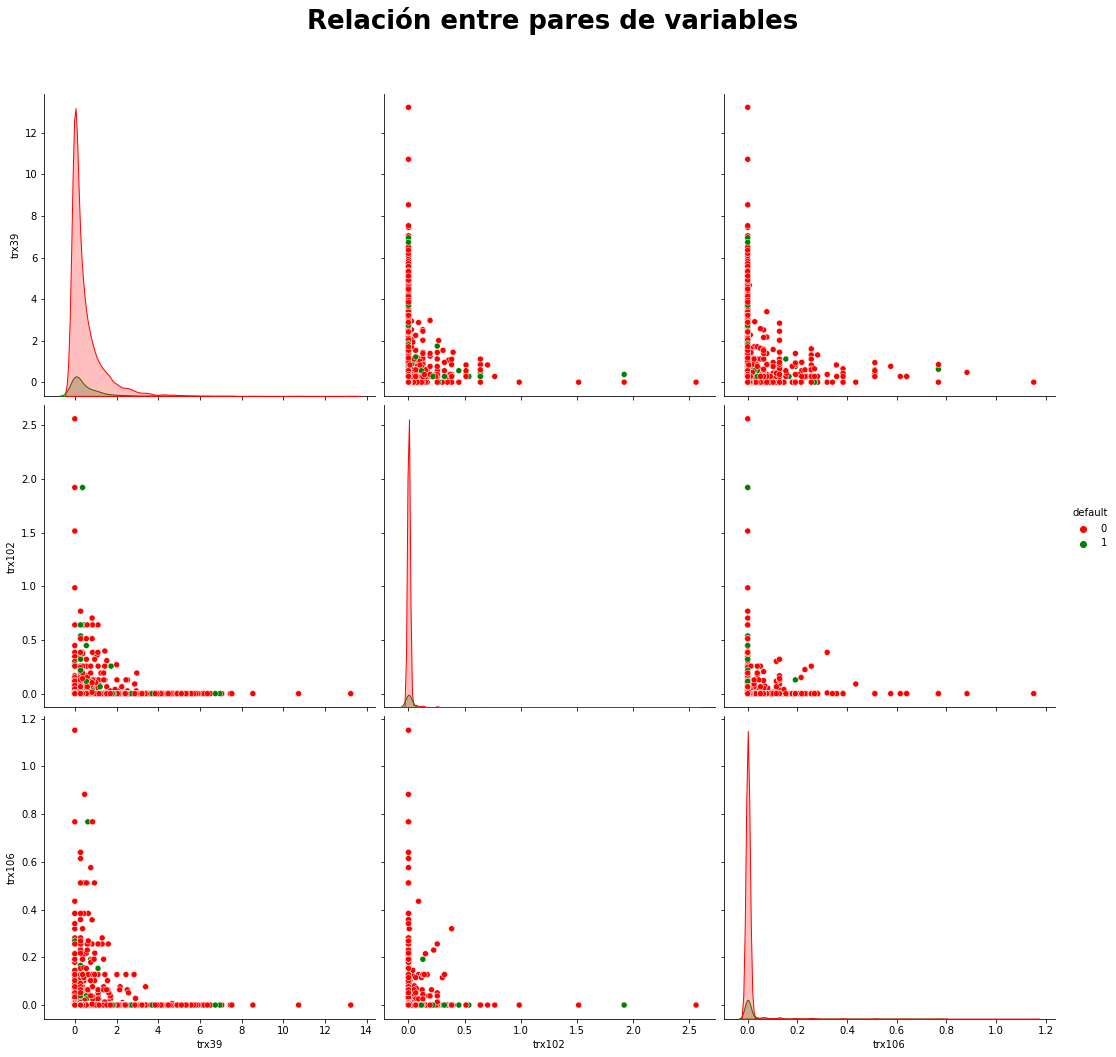

In [57]:
pal = {0:"red", 1:"green"}
g = sns.pairplot(base_train_objetivo.iloc[:,1:26], 
                               plot_kws = {"color": "darkblue"}, hue = 'default', palette = pal, height=5, diag_kws = {"color":"darkblue"})
g.fig.suptitle("Relación entre pares de variables", fontsize = 26, fontweight = "bold")
plt.subplots_adjust(top=0.9)
plt.show()

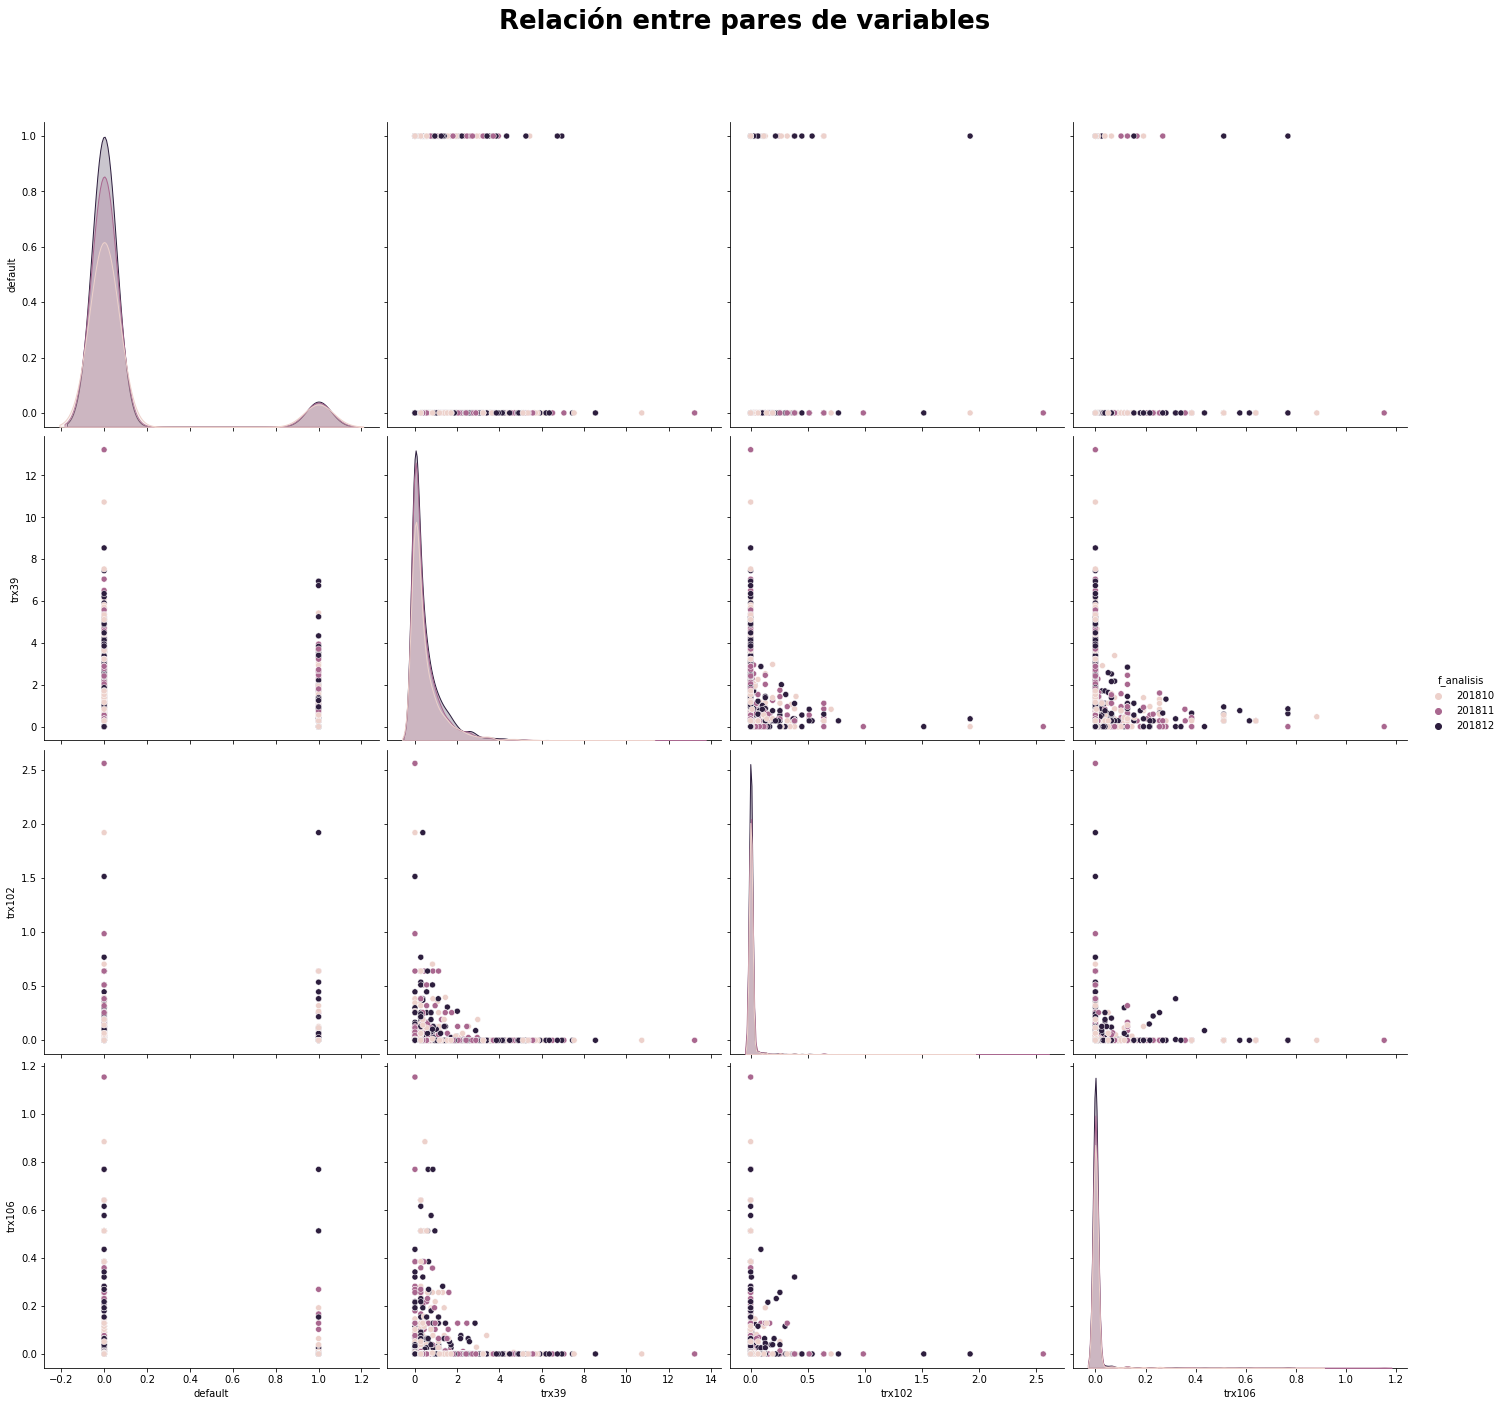

In [60]:
g = sns.pairplot(base_train_objetivo.iloc[:,0:5], 
                               plot_kws = {"color": "darkblue"}, hue = 'f_analisis', height=5, diag_kws = {"color":"darkblue"})
g.fig.suptitle("Relación entre pares de variables", fontsize = 26, fontweight = "bold")
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
g = sns.pairplot(base_train_objetivo.iloc[:,2:10], 
                               plot_kws = {"color": "darkblue"}, hue = 'disp309', height=5, diag_kws = {"color":"darkblue"})
g.fig.suptitle("Relación entre pares de variables", fontsize = 26, fontweight = "bold")
plt.subplots_adjust(top=0.9)
plt.show()

In [68]:
base_train_objetivo.loc[(base_train_objetivo['default']==0)].describe()

,f_analisis,default,trx39,trx102,trx106,trx143,trx158,disp309,CO01END010RO,CO01ACP017CC,...,CO01END086RO,CO01END094RO,CO02NUM086AH,CO02NUM043RO,CO01EXP002AH,CO01NUM002AH,CO01END051RO,CO01ACP011RO,CO02MOR092TO,CO01MOR098RO
count,5548.00000,5548.0,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.00000,...,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000
mean,201811.08832,0.0,0.504394,0.007684,0.006223,0.081201,0.074586,6.304074,0.958268,13.98540,...,26.965532,4.339865,42.244346,26.570225,9.169611,2.111031,3.494780,-0.430425,69.703256,39.054159
std,0.80658,0.0,0.860701,0.065854,0.044804,0.205343,0.168755,3.803020,3.900077,28.22324,...,38.333116,11.462169,25.914074,35.297120,23.262005,1.305616,13.802411,1.376628,44.542489,48.277295
min,201810.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.00000,...,-4.000000,-4.000000,-3.000000,-1.000000,-1.000000,-1.000000,-4.000000,-3.000000,-3.000000,-3.000000
25%,201810.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,25.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,201811.00000,0.0,0.276385,0.000000,0.000000,0.000000,0.002133,7.000000,0.070000,0.00000,...,1.425000,1.150000,36.360000,0.000000,5.000000,2.000000,0.000000,-1.000000,100.000000,-1.000000
75%,201812.00000,0.0,0.640096,0.000003,0.000001,0.035378,0.066134,8.000000,1.620000,17.00000,...,54.587500,4.845000,50.000000,53.330000,11.000000,3.000000,2.542500,0.000000,100.000000,100.000000
max,201812.00000,0.0,13.231644,2.560026,1.152012,3.022708,1.681462,12.000000,60.070000,202.00000,...,840.820000,153.090000,100.000000,100.000000,673.000000,9.000000,245.760000,18.000000,100.000000,100.000000


In [69]:
base_train_objetivo.loc[(base_train_objetivo['default']==1)].describe()

,f_analisis,default,trx39,trx102,trx106,trx143,trx158,disp309,CO01END010RO,CO01ACP017CC,...,CO01END086RO,CO01END094RO,CO02NUM086AH,CO02NUM043RO,CO01EXP002AH,CO01NUM002AH,CO01END051RO,CO01ACP011RO,CO02MOR092TO,CO01MOR098RO
count,554.000000,554.0,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,201810.980144,1.0,0.537171,0.013185,0.004650,0.057579,0.063252,5.131769,-0.331173,10.380866,...,29.562274,1.965361,43.965090,17.890325,7.608303,1.915162,2.072220,-0.696751,51.753471,25.806582
std,0.818835,0.0,0.878910,0.100456,0.043303,0.180474,0.140616,4.080426,1.623817,25.124739,...,63.640010,9.165926,28.949065,32.375142,18.417894,1.373353,13.048591,1.405912,47.533450,43.030995
min,201810.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-2.000000,...,-4.000000,-2.000000,-3.000000,-1.000000,-1.000000,-1.000000,-4.000000,-2.000000,-3.000000,-3.000000
25%,201810.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,25.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,201811.000000,1.0,0.276385,0.000000,0.000000,0.000000,0.004267,7.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,37.500000,-1.000000,3.000000,2.000000,-1.000000,-1.000000,75.067997,-1.000000
75%,201812.000000,1.0,0.829156,0.000000,0.000000,0.001327,0.053334,8.000000,0.320000,10.750000,...,66.455000,2.560000,60.000000,33.330000,8.000000,3.000000,1.142500,0.000000,100.000000,79.871495
max,201812.000000,1.0,6.950220,1.920020,0.768008,1.288865,1.527646,12.000000,10.260000,181.000000,...,1140.140000,131.840000,100.000000,100.000000,294.000000,7.000000,175.280000,20.000000,100.000000,100.000000


In [ ]:
for i in base_train_objetivo.columns[2:26]:
    for j in base_train_objetivo.columns[3:26]:
        g = sns.pairplot(base_train_objetivo, vars = [i, j], hue = 'default', palette = pal, height=5) #, hue_order = ["1", "2", "3", "4", "5", "6"]
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(i, fontsize = 20)
        g.fig.text(1,-.02, "Elaboración:", fontsize = 12, fontweight = "bold", ha = "right")
        g.fig.text(1,-.055, "Saenz (2021)", fontsize = 10, ha = "right")
        plt.show()

# Construcción del modelo

## Carga de datos y filtro de las bases

In [8]:
base_train = pd.read_csv('base_train.csv', sep="|") 
base_train = base_train.loc[(base_train['tipo_cliente']=='objetivo')]
num_doc_train = base_train['num_doc']
base_train = base_train.drop(['num_doc', 'f_analisis', 'tipo_cliente'], axis=1)
base_train

,default,trx39,trx102,trx106,trx143,trx158,disp309,CO01END010RO,CO01ACP017CC,CO02EXP011TO,...,CO01END086RO,CO01END094RO,CO02NUM086AH,CO02NUM043RO,CO01EXP002AH,CO01NUM002AH,CO01END051RO,CO01ACP011RO,CO02MOR092TO,CO01MOR098RO
5,0,0.000000,0.000000,0.000000,0.000000,0.000000,12.0,0.57,9.0,75.00,...,76.97,1.92,-1.00,25.00,-1.0,-1.0,1.16,0.0,100.00000,95.946045
9,0,0.000000,0.000001,0.000001,0.000000,0.000000,7.0,0.65,12.0,75.00,...,53.64,4.48,50.00,50.00,12.0,2.0,5.70,1.0,100.00000,100.000000
12,0,1.105542,0.000000,0.000000,0.707554,0.213336,8.0,0.15,140.0,85.71,...,87.80,6.40,57.14,50.00,3.0,4.0,-4.00,0.0,91.81353,-3.000000
18,0,0.276385,0.000000,0.000000,0.000000,0.002133,7.0,-1.00,-2.0,83.33,...,-1.00,-1.00,50.00,-1.00,0.0,3.0,-1.00,-1.0,100.00000,-1.000000
21,0,0.276385,0.000005,0.000000,0.000000,0.039467,6.0,0.34,95.0,36.36,...,90.45,5.31,36.36,50.00,0.0,4.0,7.90,1.0,100.00000,89.226580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28245,0,0.000000,0.000000,0.000000,0.000000,0.000000,12.0,-1.00,-1.0,-1.00,...,-1.00,-1.00,-3.00,-1.00,-1.0,-1.0,-1.00,-1.0,-1.00000,-1.000000
28249,0,0.829156,0.012800,0.003840,0.424532,0.097068,7.0,0.89,-1.0,33.33,...,16.44,2.56,33.33,33.33,2.0,2.0,0.01,0.0,100.00000,100.000000
28254,0,0.276385,0.000000,0.000000,0.000000,0.008533,8.0,2.33,4.0,77.78,...,47.28,4.28,44.44,0.00,19.0,4.0,2.18,-2.0,100.00000,100.000000
28261,0,0.276385,0.000000,0.000000,0.000000,0.008533,8.0,7.83,98.0,62.50,...,1.57,14.72,37.50,0.00,2.0,3.0,0.00,-2.0,100.00000,100.000000


In [10]:
base_prueba = pd.read_csv('base_validacion.csv', sep="|")
num_doc_prueba = base_prueba['num_doc']
base_prueba = base_prueba.drop(['num_doc', 'f_analisis', 'tipo_cliente'], axis=1)
base_prueba

,default,trx39,trx102,trx106,trx143,trx158,disp309,CO01END010RO,CO01ACP017CC,CO02EXP011TO,...,CO01END086RO,CO01END094RO,CO02NUM086AH,CO02NUM043RO,CO01EXP002AH,CO01NUM002AH,CO01END051RO,CO01ACP011RO,CO02MOR092TO,CO01MOR098RO
0,0,0.000000,0.000000,0.000000,0.017689,0.000000,8,4.76,-2,90.00,...,19.29,8.96,30.00,28.57,7,3,6.48,0,100.0,100.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,8.73,1,92.31,...,38.15,15.36,14.29,64.29,15,2,4.55,2,100.0,100.000000
2,0,0.000000,0.000000,0.000000,0.044807,0.000000,8,0.65,-1,100.00,...,34.15,1.73,40.00,0.00,5,2,0.00,-2,100.0,100.000000
3,0,1.027402,0.256003,0.000001,0.251293,0.330670,8,-2.00,1,57.14,...,-3.00,-2.00,14.29,100.00,3,1,1.49,1,100.0,44.882557
4,0,0.276385,0.000000,0.000000,0.000000,0.010667,6,0.31,-1,100.00,...,71.58,0.38,33.33,0.00,2,1,0.76,-2,-3.0,-3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0,0.000000,0.000000,0.000000,0.000000,0.000000,6,1.53,-1,75.00,...,0.00,1.53,75.00,0.00,15,3,0.00,-2,100.0,100.000000
2064,0,0.000000,0.000000,0.000000,0.035378,0.000000,6,2.90,-1,100.00,...,13.03,3.84,38.46,85.71,11,5,1.02,0,100.0,100.000000
2065,0,0.000000,0.000000,0.000000,0.000000,0.000000,6,-3.00,-2,60.00,...,108.32,5.50,20.00,0.00,65,1,5.35,-2,100.0,100.000000
2066,0,0.645497,0.000001,0.000012,0.239469,0.168535,6,0.21,2,100.00,...,62.68,1.28,50.00,0.00,3,3,1.66,-2,100.0,98.185800


In [12]:
base_train['default'].value_counts()/base_train.shape[0]
# Están desbalanceados
#Toma el valor de uno cuando el cliente incumplió el pago de su obligación.
#Toma el valor de cero cuando el cliente cumplió con el pago.

0    0.90921
1    0.09079
Name: default, dtype: float64

In [13]:
##### Seleccionar bases de entrenamiento y prueba
X_train = base_train.drop('default', axis=1)
X_test = base_prueba.drop('default', axis=1)
y_train = base_train['default']
y_test = base_prueba['default']

In [14]:
# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(6102, 24) (2068, 24)


## Regresión logística

In [15]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
pred_logisticRegr = logisticRegr.predict(X_test_scaled)
score_lr = logisticRegr.score(X_test_scaled, y_test)
print(score_lr)

0.9264990328820116


In [18]:
pd.DataFrame(pred_logisticRegr).value_counts()/pd.DataFrame(pred_logisticRegr).shape[0]

0    0.999033
1    0.000967
dtype: float64

In [19]:
base_prueba['default'].value_counts()/base_prueba.shape[0]
# La predicción de la regresión logística es bastante desbalanceada

0    0.927466
1    0.072534
Name: default, dtype: float64

In [20]:
##### Se realiza la construcción de una grilla de parámetros 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'tol': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}]
sgd_clf = LogisticRegression(max_iter=200000,penalty='l1',
                             solver='liblinear',random_state = 1005)
model_cv = GridSearchCV(estimator = sgd_clf, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs=10)

In [ ]:
logisticRegr = model_cv.fit(X_train_scaled, y_train) 
pred_logisticRegr = logisticRegr.predict(X_test_scaled)
score_lr = logisticRegr.score(X_test_scaled, y_test)
print(score_lr) # La precisión se mantuvo igual.

In [22]:
#probabilidad de incumplimiento esperada por grupo, es decir que es default==1
pred_prob_logisticRegr = logisticRegr.predict_proba(X_test_scaled)
pd.DataFrame(pred_prob_logisticRegr).mean() # debería ser más desbalanceado

0    0.908362
1    0.091638
dtype: float64

In [23]:
base_prueba['default'].value_counts()/base_prueba.shape[0]
# El balance se acerca más al conjunto de prueba

0    0.927466
1    0.072534
Name: default, dtype: float64

In [24]:
prob_incum_logistic = pd.DataFrame(pred_prob_logisticRegr[:,1:])

In [25]:
bins = [0, 0.010, 0.015, 0.030, 0.045, 0.080, 0.150, 0.300, 1.0]
names = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8"]
prob_incum_logistic['Grupo_de_Riesgo'] = pd.cut(prob_incum_logistic[0], bins,labels = names)
prob_incum_logistic['Grupo_de_Riesgo'].value_counts().sort_index()

T1     21
T2     13
T3     77
T4    159
T5    701
T6    863
T7    232
T8      2
Name: Grupo_de_Riesgo, dtype: int64

In [ ]:
## Estos son los resultados de la regresión logística por grupo de riesgo.

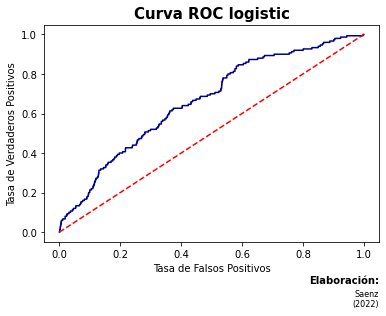

In [26]:
logit_roc_auc = roc_auc_score(y_test, pred_logisticRegr)
FP, VP, umbral = roc_curve(y_test, logisticRegr.predict_proba(X_test_scaled)[:,1])
fig, ax = plt.subplots()
ax.plot(FP, VP, color = "darkblue")
ax.plot([0,1], [0,1], linestyle = "--", color = "red")
ax.set_xlabel("Tasa de Falsos Positivos")
ax.set_ylabel("Tasa de Verdaderos Positivos")
ax.set_title("Curva ROC logistic", fontweight = "bold", size = 15)
fig.text(.9,-.02, "Elaboración:", fontsize = 10, fontweight = "bold",
         ha = "right")
fig.text(.9,-.1, "Saenz\n(2022)", fontsize = 8, ha = "right")
plt.show()

## Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=30, max_depth=10)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30)

In [28]:
score_rf = rf.score(X_test_scaled, y_test)
print(score_rf)

0.9264990328820116


In [29]:
pred_rf = rf.predict(X_test_scaled)
# La precisión es igual que el modelo logístico, se construye una grilla de parámetros para ver si mejora

In [32]:
n_estimators =  [10,15,20,25,30,35,40,45,50,55,60,65,70,75]
max_depth = [10,15,20,21,24,25]
min_samples_split = [1, 2, 3, 5, 10]
min_samples_leaf = [1, 2, 3, 5, 10]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

In [ ]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = 5, verbose = 2, scoring='accuracy')
rf_cv = grid_search.fit(X_train_scaled, y_train)

In [37]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=15)

In [ ]:
#rf = RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,n_estimators=70)

In [38]:
score_rf = grid_search.score(X_test_scaled, y_test)
print(score_rf) # Mejoró la precisión

0.9269825918762089


In [39]:
pred_rf = grid_search.predict(X_test_scaled)

In [40]:
pd.DataFrame(pred_rf).value_counts()/pd.DataFrame(pred_rf).shape[0]
# Está desbalanceada la predicción, hay que mirar como se comporta con las probabilidades.

0    0.999516
1    0.000484
dtype: float64

In [41]:
base_prueba['default'].value_counts()/base_prueba.shape[0]

0    0.927466
1    0.072534
Name: default, dtype: float64

In [42]:
#probabilidad de incumplimiento esperada por grupo, es decir que es default==1
pred_prob_rf = grid_search.predict_proba(X_test_scaled)
pd.DataFrame(pred_prob_rf).mean() # debería ser más desbalanceado, aunque tiene un buen comportamiento

0    0.910244
1    0.089756
dtype: float64

In [43]:
prob_incum_rf = pd.DataFrame(pred_prob_rf[:,1:])

In [44]:
prob_incum_rf['Grupo_de_Riesgo'] = pd.cut(prob_incum_rf[0], bins, labels = names)
prob_incum_rf['Grupo_de_Riesgo'].value_counts().sort_index()

T1    106
T2     58
T3    188
T4    208
T5    413
T6    643
T7    351
T8     18
Name: Grupo_de_Riesgo, dtype: int64

In [ ]:
## Estos son los resultados del Random Forest por grupo de riesgo.

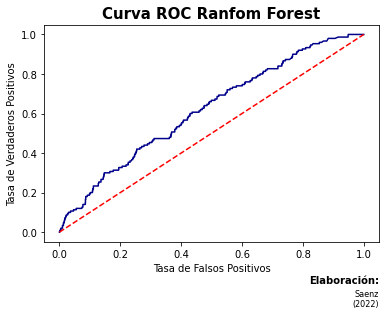

In [105]:
rf_roc_auc = roc_auc_score(y_test, pred_rf)
FP, VP, umbral = roc_curve(y_test, grid_search.predict_proba(X_test_scaled)[:,1])
fig, ax = plt.subplots()
ax.plot(FP, VP, color = "darkblue")
ax.plot([0,1], [0,1], linestyle = "--", color = "red")
ax.set_xlabel("Tasa de Falsos Positivos")
ax.set_ylabel("Tasa de Verdaderos Positivos")
ax.set_title("Curva ROC Ranfom Forest", fontweight = "bold", size = 15)
fig.text(.9,-.02, "Elaboración:", fontsize = 10, fontweight = "bold",
         ha = "right")
fig.text(.9,-.1, "Saenz\n(2022)", fontsize = 8, ha = "right")
plt.show()

## k nearest neighbor

In [46]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)
score_knn = knn.score(X_test_scaled, y_test)
print(score_knn)

0.9144100580270793


In [47]:
pred_knn = knn.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, pred_knn)
print(cm)

[[1887   31]
 [ 146    4]]


In [48]:
pd.DataFrame(pred_knn).value_counts()/pd.DataFrame(pred_knn).shape[0]
# Está desbalanceada la predicción

0    0.983075
1    0.016925
dtype: float64

In [49]:
base_prueba['default'].value_counts()/base_prueba.shape[0]

0    0.927466
1    0.072534
Name: default, dtype: float64

In [50]:
# Se construye una grilla de parámetros
param_grid = [{'n_neighbors': range(1,20,1),}]
knn_cv_roc = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=-1)
knn_cv_roc.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(1, 20)}], scoring='accuracy',
             verbose=1)

In [51]:
knn_cv_roc.best_estimator_

KNeighborsClassifier(n_neighbors=14)

In [52]:
score_knn = knn_cv_roc.score(X_test_scaled, y_test)
print(score_knn) # Mejoró la precisión con la grilla que se definió

0.9260154738878144


In [53]:
pred_knn = knn_cv_roc.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, pred_knn)
print(cm)

[[1915    3]
 [ 150    0]]


In [54]:
pd.DataFrame(pred_knn).value_counts()/pd.DataFrame(pred_knn).shape[0]
# Está bastante desbalanceado, hay que mirar como se comporta con la probabilidad

0    0.998549
1    0.001451
dtype: float64

In [55]:
base_prueba['default'].value_counts()/base_prueba.shape[0]

0    0.927466
1    0.072534
Name: default, dtype: float64

In [56]:
#probabilidad de incumplimiento esperada por grupo, es decir que es default==1
pred_prob_knn = knn_cv_roc.predict_proba(X_test_scaled)
pd.DataFrame(pred_prob_knn).mean()
# Mejora bastante cuando se predice por probabilidad.

0    0.918831
1    0.081169
dtype: float64

In [57]:
prob_incum_knn = pd.DataFrame(pred_prob_knn[:,1:])

In [58]:
prob_incum_knn['Grupo_de_Riesgo'] = pd.cut(prob_incum_knn[0], bins, labels = names)
prob_incum_knn['Grupo_de_Riesgo'].value_counts().sort_index()

T1      0
T2      0
T3      0
T4      0
T5    664
T6    389
T7    196
T8     45
Name: Grupo_de_Riesgo, dtype: int64

In [ ]:
## Estos son los resultados del KNN por grupo de riesgo. No le fue tan bien ya que en los primeros 4 grupos
## no se presentan datos

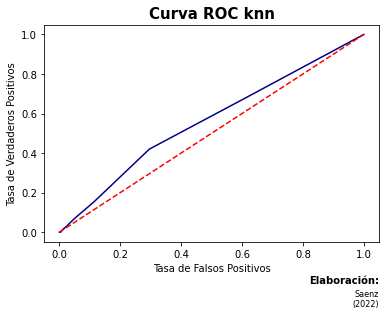

In [59]:
knn_roc_auc = roc_auc_score(y_test, pred_knn)
FP, VP, umbral = roc_curve(y_test, knn_cv_roc.predict_proba(X_test_scaled)[:,1])
fig, ax = plt.subplots()
ax.plot(FP, VP, color = "darkblue")
ax.plot([0,1], [0,1], linestyle = "--", color = "red")
ax.set_xlabel("Tasa de Falsos Positivos")
ax.set_ylabel("Tasa de Verdaderos Positivos")
ax.set_title("Curva ROC knn", fontweight = "bold", size = 15)
fig.text(.9,-.02, "Elaboración:", fontsize = 10, fontweight = "bold",
         ha = "right")
fig.text(.9,-.1, "Saenz\n(2022)", fontsize = 8, ha = "right")
plt.show()

## Support Vector Machine

In [62]:
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
score_svm = svc.score(X_test_scaled, y_test)
print(score_svm)

0.9274661508704062


In [63]:
pred_svm = svc.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, pred_svm)
print(cm)

[[1918    0]
 [ 150    0]]


In [ ]:
### Definir una grilla de parámetros para SVC
svc = SVC() 
parameters = [ {'C':[1, 3, 8, 10], 'kernel':['linear']},
               {'C':[1, 3, 8, 10], 'kernel':['rbf'], 
                'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 3, 8, 10], 'kernel':['poly'], 'degree': [2,3,4],
                'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search_svm = GridSearchCV(estimator = svc,
                               param_grid = parameters,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)

grid_search_svm.fit(X_train_scaled, y_train)

In [ ]:
grid_search_svm.best_estimator_

In [ ]:
score_svm = grid_search_svm.score(X_test_scaled, y_test)
print(score_svm) # Estuvo mejor la precisión con los parámetros por default

In [66]:
pd.DataFrame(pred_svm).value_counts()/pd.DataFrame(pred_svm).shape[0]
base_prueba['default'].value_counts()/base_prueba.shape[0]

0    0.927466
1    0.072534
Name: default, dtype: float64

In [67]:
#probabilidad de incumplimiento esperada por grupo, es decir que es default==1
pred_prob_svm = svc.predict_proba(X_test_scaled)
pd.DataFrame(pred_prob_svm).mean() # Presenta un buen comportamiento en las probabilidades.

0    0.909727
1    0.090273
dtype: float64

In [68]:
prob_incum_svm = pd.DataFrame(pred_prob_svm[:,1:])

In [69]:
prob_incum_svm['Grupo_de_Riesgo'] = pd.cut(prob_incum_svm[0], bins, labels = names)
prob_incum_svm['Grupo_de_Riesgo'].value_counts().sort_index()

T1       0
T2       0
T3       0
T4       8
T5     382
T6    1651
T7      24
T8       3
Name: Grupo_de_Riesgo, dtype: int64

In [ ]:
## Estos son los resultados del SVM por grupo de riesgo. No le fue tan bien ya que en los primeros 3 grupos
## no se presentan datos

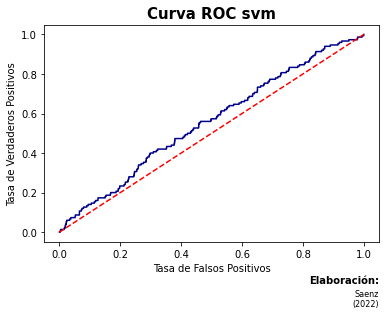

In [70]:
svm_roc_auc = roc_auc_score(y_test, pred_svm)
FP, VP, umbral = roc_curve(y_test, svc.predict_proba(X_test_scaled)[:,1])
fig, ax = plt.subplots()
ax.plot(FP, VP, color = "darkblue")
ax.plot([0,1], [0,1], linestyle = "--", color = "red")
ax.set_xlabel("Tasa de Falsos Positivos")
ax.set_ylabel("Tasa de Verdaderos Positivos")
ax.set_title("Curva ROC svm", fontweight = "bold", size = 15)
fig.text(.9,-.02, "Elaboración:", fontsize = 10, fontweight = "bold",
         ha = "right")
fig.text(.9,-.1, "Saenz\n(2022)", fontsize = 8, ha = "right")
plt.show()

## Red neuronal

### Primera red neuronal

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [73]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
191/191 [==============================] - 1s 1ms/step - loss: 0.2937 - accuracy: 0.9092
Epoch 2/20
191/191 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.9092
Epoch 3/20
191/191 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.9092
Epoch 4/20
191/191 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.9092
Epoch 5/20
191/191 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.9092
Epoch 6/20
191/191 [==============================] - 0s 1ms/step - loss: 0.2877 - accuracy: 0.9092
Epoch 7/20
191/191 [==============================] - 0s 942us/step - loss: 0.2862 - accuracy: 0.9092
Epoch 8/20
191/191 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.9092
Epoch 9/20
191/191 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.9092
Epoch 10/20
191/191 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.90

In [74]:
model.evaluate(X_test_scaled, y_test)

65/65 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.9275


[0.25458472967147827, 0.9274661540985107]

In [ ]:
# Esta primera red neuronal arroja una precisión de 0.9275, superior al Random Forest que fue el mejor según
# esta métrica

In [75]:
pred_NN = model.predict(X_test_scaled)
pred_NN = pd.DataFrame(pred_NN)
pred_NN['Grupo_de_Riesgo'] = pd.cut(pred_NN[0], bins, labels = names)
pred_NN['Grupo_de_Riesgo'].value_counts().sort_index()

T1     46
T2     44
T3    121
T4    247
T5    650
T6    639
T7    320
T8      1
Name: Grupo_de_Riesgo, dtype: int64

In [ ]:
## Estos son los resultados de la primera red neuronal por grupo de riesgo.

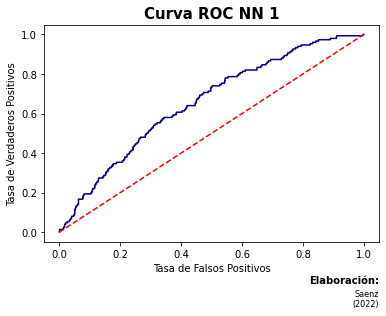

In [77]:
NN_roc_auc = roc_auc_score(y_test, pred_NN[0])
FP, VP, umbral = roc_curve(y_test, pred_NN[0])
fig, ax = plt.subplots()
ax.plot(FP, VP, color = "darkblue")
ax.plot([0,1], [0,1], linestyle = "--", color = "red")
ax.set_xlabel("Tasa de Falsos Positivos")
ax.set_ylabel("Tasa de Verdaderos Positivos")
ax.set_title("Curva ROC NN 1", fontweight = "bold", size = 15)
fig.text(.9,-.02, "Elaboración:", fontsize = 10, fontweight = "bold",
         ha = "right")
fig.text(.9,-.1, "Saenz\n(2022)", fontsize = 8, ha = "right")
plt.show()

### Segunda red neuronal: Entrenada con una grilla de parámetros, número de capas ocultas y neuronas

In [78]:
#Crear el conjunto de validación para la red neuronal
X_train_scaled = pd.DataFrame(X_train_scaled)
y_train = pd.DataFrame(y_train)
X_train2, X_val, y_train2, y_val = train_test_split(X_train_scaled, 
                                                    y_train['default'],
                                                    test_size=0.2, random_state=13)
X_train2.shape, X_val.shape, y_train2.shape, y_val.shape

((4881, 24), (1221, 24), (4881,), (1221,))

In [91]:
# This returns a multi-layer-perceptron model in Keras.
def get_keras_model(num_hidden_layers, 
                    num_neurons_per_layer, 
                    dropout_rate, 
                    activation):
    # create the MLP model.
    
    # define the layers.
    inputs = tf.keras.Input(shape=(X_train2.shape[1],))  # input layer.
    x = layers.Dropout(dropout_rate)(inputs) # dropout on the weights.
    
    # Add the hidden layers.
    for i in range(num_hidden_layers):
        x = layers.Dense(num_neurons_per_layer, 
                         activation=activation)(x)
        x = layers.Dropout(dropout_rate)(x)
    
    # output layer.
    outputs = layers.Dense(1, activation='sigmoid')(x) #Binary classification
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [92]:
# This function takes in the hyperparameters and returns a score (Cross validation).
def keras_mlp_cv_score(parameterization, weight=None):
    
    model = get_keras_model(parameterization.get('num_hidden_layers'),
                            parameterization.get('neurons_per_layer'),
                            parameterization.get('dropout_rate'),
                            parameterization.get('activation'))
    
    opt = parameterization.get('optimizer')
    opt = opt.lower()
    
    learning_rate = parameterization.get('learning_rate')
    
    if opt == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif opt == 'rms':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    NUM_EPOCHS = 20
    
    # Specify the training configuration.
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

    data = X_train2
    labels = y_train2
    
    # fit the model using validation_data=(X_val,y_val) validation set.
    res = model.fit(data, labels, epochs=NUM_EPOCHS, 
                    batch_size=parameterization.get('batch_size'),
                    validation_data=(X_val,y_val))
    
    # look at the last 10 epochs. Get the mean and standard deviation of the
    #validation score.
    last10_scores = np.array(res.history['val_loss'][-10:])
    mean = last10_scores.mean()
    sem = last10_scores.std()
    
    # If the model didn't converge then set a high loss.
    if np.isnan(mean):
        return 9999.0, 0.0
    
    return mean, sem

In [93]:
# Define the search space.
parameters=[
    {
        "name": "learning_rate",
        "type": "range",
        "bounds": [0.001, 0.002],
        "log_scale": True,
    },
    {
        "name": "dropout_rate",
        "type": "range",
        "bounds": [0.01, 0.02],
        "log_scale": True,
    },
    {
        "name": "num_hidden_layers",
        "type": "range",
        "bounds": [1, 3],
        "value_type": "int"
    },
    {
        "name": "neurons_per_layer",
        "type": "range",
        "bounds": [16, 32],
        "value_type": "int"
    },
    {
        "name": "batch_size",
        "type": "choice",
        "values": [16, 32],
    },
    
    {
        "name": "activation",
        "type": "choice",
        "values": ['tanh', 'sigmoid', 'relu'],
    },
    {
        "name": "optimizer",
        "type": "choice",
        "values": ['adam', 'rms'],
    },
]

In [ ]:
init_notebook_plotting()
ax_client = AxClient()
# create the experiment.
ax_client.create_experiment(
    name="keras_experiment",
    parameters=parameters,
    objective_name='keras_cv',
    minimize=True)
def evaluate(parameters):
    return {"keras_cv": keras_mlp_cv_score(parameters)}

In [95]:
for i in range(20):
    parameters, trial_index = ax_client.get_next_trial()
    ax_client.complete_trial(trial_index=trial_index, raw_data=evaluate(parameters))

[INFO 04-13 23:09:47] ax.service.ax_client: Generated new trial 0 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 1, 'neurons_per_layer': 30, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.9086 - val_loss: 0.2997 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.9090 - val_loss: 0.2943 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.9090 - val_loss: 0.2926 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.9090 - val_loss: 0.2913 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.9090 - val_loss: 0.2903 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.9090 - val_loss: 0.2898 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9090 - val_loss: 0.2896 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:09:52] ax.service.ax_client: Completed trial 0 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:09:52] ax.service.ax_client: Generated new trial 1 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 3, 'neurons_per_layer': 30, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.9090 - val_loss: 0.3015 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.9090 - val_loss: 0.2994 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.9090 - val_loss: 0.2966 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.9090 - val_loss: 0.2958 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.9090 - val_loss: 0.3092 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.9090 - val_loss: 0.2942 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.9090 - val_loss: 0.2907 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:09:59] ax.service.ax_client: Completed trial 1 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:09:59] ax.service.ax_client: Generated new trial 2 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 3, 'neurons_per_layer': 30, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.3511 - accuracy: 0.9012 - val_loss: 0.3071 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.9090 - val_loss: 0.2973 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.9090 - val_loss: 0.2957 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.9090 - val_loss: 0.2968 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2835 - accuracy: 0.9090 - val_loss: 0.2934 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.9088 - val_loss: 0.2937 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.9090 - val_loss: 0.2933 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:10:05] ax.service.ax_client: Completed trial 2 with data: {'keras_cv': (0.3, 0.0)}.
[INFO 04-13 23:10:05] ax.service.ax_client: Generated new trial 3 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 1, 'neurons_per_layer': 23, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8386 - val_loss: 0.3163 - val_accuracy: 0.9066
Epoch 2/20
153/153 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.9080 - val_loss: 0.3091 - val_accuracy: 0.9091
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.9086 - val_loss: 0.3034 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.9088 - val_loss: 0.3008 - val_accuracy: 0.9107
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.9082 - val_loss: 0.2997 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.9090 - val_loss: 0.2996 - val_accuracy: 0.9107
Epoch 7/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.9084 - val_loss: 0.2981 - val_accuracy: 0.9107
Epoch 

[INFO 04-13 23:10:10] ax.service.ax_client: Completed trial 3 with data: {'keras_cv': (0.3, 0.0)}.
[INFO 04-13 23:10:10] ax.service.ax_client: Generated new trial 4 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 2, 'neurons_per_layer': 25, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
306/306 [==============================] - 1s 2ms/step - loss: 0.3597 - accuracy: 0.8812 - val_loss: 0.2948 - val_accuracy: 0.9099
Epoch 2/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.9092 - val_loss: 0.2984 - val_accuracy: 0.9099
Epoch 3/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.9090 - val_loss: 0.2900 - val_accuracy: 0.9099
Epoch 4/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2872 - accuracy: 0.9090 - val_loss: 0.2915 - val_accuracy: 0.9099
Epoch 5/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2853 - accuracy: 0.9088 - val_loss: 0.2911 - val_accuracy: 0.9099
Epoch 6/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.9092 - val_loss: 0.2956 - val_accuracy: 0.9099
Epoch 7/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.9090 - val_loss: 0.2942 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:10:20] ax.service.ax_client: Completed trial 4 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:10:20] ax.service.ax_client: Generated new trial 5 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 2, 'neurons_per_layer': 20, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.9064 - val_loss: 0.2990 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.9090 - val_loss: 0.2954 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.9090 - val_loss: 0.2924 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.9088 - val_loss: 0.2927 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.9090 - val_loss: 0.2890 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.9090 - val_loss: 0.2892 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.9090 - val_loss: 0.2884 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:10:26] ax.service.ax_client: Completed trial 5 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:10:26] ax.service.ax_client: Generated new trial 6 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 3, 'neurons_per_layer': 22, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
306/306 [==============================] - 1s 2ms/step - loss: 0.3621 - accuracy: 0.8787 - val_loss: 0.2993 - val_accuracy: 0.9099
Epoch 2/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2920 - accuracy: 0.9090 - val_loss: 0.2967 - val_accuracy: 0.9099
Epoch 3/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2884 - accuracy: 0.9088 - val_loss: 0.2918 - val_accuracy: 0.9099
Epoch 4/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2858 - accuracy: 0.9086 - val_loss: 0.2956 - val_accuracy: 0.9099
Epoch 5/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.9084 - val_loss: 0.2901 - val_accuracy: 0.9099
Epoch 6/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2830 - accuracy: 0.9088 - val_loss: 0.2884 - val_accuracy: 0.9099
Epoch 7/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.9086 - val_loss: 0.2895 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:10:38] ax.service.ax_client: Completed trial 6 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:10:38] ax.service.ax_client: Generated new trial 7 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 3, 'neurons_per_layer': 24, 'batch_size': 16, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/20
306/306 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.9084 - val_loss: 0.3001 - val_accuracy: 0.9099
Epoch 2/20
306/306 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.9090 - val_loss: 0.2924 - val_accuracy: 0.9099
Epoch 3/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2886 - accuracy: 0.9090 - val_loss: 0.2937 - val_accuracy: 0.9099
Epoch 4/20
306/306 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.9092 - val_loss: 0.2956 - val_accuracy: 0.9099
Epoch 5/20
306/306 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.9088 - val_loss: 0.2951 - val_accuracy: 0.9099
Epoch 6/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2781 - accuracy: 0.9092 - val_loss: 0.2935 - val_accuracy: 0.9099
Epoch 7/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.9090 - val_loss: 0.2976 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:10:48] ax.service.ax_client: Completed trial 7 with data: {'keras_cv': (0.3, 0.0)}.
[INFO 04-13 23:10:48] ax.service.ax_client: Generated new trial 8 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 2, 'neurons_per_layer': 18, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.8177 - val_loss: 0.3356 - val_accuracy: 0.8968
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.9058 - val_loss: 0.2969 - val_accuracy: 0.9091
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.9076 - val_loss: 0.2887 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.9084 - val_loss: 0.2865 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.9092 - val_loss: 0.2867 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.9084 - val_loss: 0.2890 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.9090 - val_loss: 0.2877 - val_accuracy: 0.9107
Epoch 

[INFO 04-13 23:10:53] ax.service.ax_client: Completed trial 8 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:10:53] ax.service.ax_client: Generated new trial 9 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 2, 'neurons_per_layer': 25, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'adam'}.


Epoch 1/20
306/306 [==============================] - 1s 2ms/step - loss: 0.4029 - accuracy: 0.8556 - val_loss: 0.2976 - val_accuracy: 0.9099
Epoch 2/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2905 - accuracy: 0.9084 - val_loss: 0.2906 - val_accuracy: 0.9099
Epoch 3/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2871 - accuracy: 0.9082 - val_loss: 0.2892 - val_accuracy: 0.9099
Epoch 4/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2855 - accuracy: 0.9092 - val_loss: 0.2883 - val_accuracy: 0.9099
Epoch 5/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.9092 - val_loss: 0.2880 - val_accuracy: 0.9099
Epoch 6/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2799 - accuracy: 0.9090 - val_loss: 0.2882 - val_accuracy: 0.9099
Epoch 7/20
306/306 [==============================] - 1s 2ms/step - loss: 0.2817 - accuracy: 0.9088 - val_loss: 0.2904 - val_accuracy: 0.9107
Epoch 

[INFO 04-13 23:11:06] ax.service.ax_client: Completed trial 9 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:11:06] ax.service.ax_client: Generated new trial 10 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 3, 'neurons_per_layer': 18, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam'}.


Epoch 1/20
153/153 [==============================] - 1s 3ms/step - loss: 0.3642 - accuracy: 0.8922 - val_loss: 0.3147 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.9090 - val_loss: 0.3068 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.9090 - val_loss: 0.3034 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.9088 - val_loss: 0.2957 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.9090 - val_loss: 0.2956 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9086 - val_loss: 0.2996 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.9088 - val_loss: 0.2953 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:11:12] ax.service.ax_client: Completed trial 10 with data: {'keras_cv': (0.3, 0.0)}.
[INFO 04-13 23:11:12] ax.service.ax_client: Generated new trial 11 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 3, 'neurons_per_layer': 26, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 3ms/step - loss: 0.3714 - accuracy: 0.8756 - val_loss: 0.2935 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.9084 - val_loss: 0.2894 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.9090 - val_loss: 0.2895 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.9092 - val_loss: 0.2904 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.9092 - val_loss: 0.2855 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.9090 - val_loss: 0.2943 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9090 - val_loss: 0.2865 - val_accuracy: 0.9107
Epoch 

[INFO 04-13 23:11:18] ax.service.ax_client: Completed trial 11 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:11:19] ax.service.ax_client: Generated new trial 12 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 1, 'neurons_per_layer': 26, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.3754 - accuracy: 0.8996 - val_loss: 0.2999 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.9090 - val_loss: 0.2959 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.9090 - val_loss: 0.2931 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2891 - accuracy: 0.9090 - val_loss: 0.2936 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.9090 - val_loss: 0.2917 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.9090 - val_loss: 0.2914 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.9090 - val_loss: 0.2899 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:11:23] ax.service.ax_client: Completed trial 12 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:11:23] ax.service.ax_client: Generated new trial 13 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 3, 'neurons_per_layer': 31, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.3238 - accuracy: 0.9086 - val_loss: 0.3018 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.9090 - val_loss: 0.2991 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.9090 - val_loss: 0.2974 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.9090 - val_loss: 0.2967 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.9090 - val_loss: 0.2948 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.9090 - val_loss: 0.2994 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.9090 - val_loss: 0.2936 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:11:29] ax.service.ax_client: Completed trial 13 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:11:29] ax.service.ax_client: Generated new trial 14 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 3, 'neurons_per_layer': 25, 'batch_size': 16, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
306/306 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8937 - val_loss: 0.2938 - val_accuracy: 0.9099
Epoch 2/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.9086 - val_loss: 0.2969 - val_accuracy: 0.9099
Epoch 3/20
306/306 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.9086 - val_loss: 0.2943 - val_accuracy: 0.9099
Epoch 4/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9084 - val_loss: 0.2982 - val_accuracy: 0.9091
Epoch 5/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.9084 - val_loss: 0.2946 - val_accuracy: 0.9099
Epoch 6/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2857 - accuracy: 0.9084 - val_loss: 0.2898 - val_accuracy: 0.9099
Epoch 7/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.9090 - val_loss: 0.2919 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:11:38] ax.service.ax_client: Completed trial 14 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:11:38] ax.service.ax_client: Generated new trial 15 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 3, 'neurons_per_layer': 20, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.3724 - accuracy: 0.8695 - val_loss: 0.2970 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.9090 - val_loss: 0.2937 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2890 - accuracy: 0.9086 - val_loss: 0.2902 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.9088 - val_loss: 0.2917 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2843 - accuracy: 0.9090 - val_loss: 0.2909 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.9082 - val_loss: 0.2933 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.9090 - val_loss: 0.2919 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:11:43] ax.service.ax_client: Completed trial 15 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:11:43] ax.service.ax_client: Generated new trial 16 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 1, 'neurons_per_layer': 23, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 1.0471 - accuracy: 0.2922 - val_loss: 0.5101 - val_accuracy: 0.8935
Epoch 2/20
153/153 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.9062 - val_loss: 0.2997 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2950 - accuracy: 0.9090 - val_loss: 0.2952 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.9090 - val_loss: 0.2928 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.9090 - val_loss: 0.2922 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.9090 - val_loss: 0.2911 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.9090 - val_loss: 0.2910 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:11:48] ax.service.ax_client: Completed trial 16 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:11:48] ax.service.ax_client: Generated new trial 17 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 3, 'neurons_per_layer': 17, 'batch_size': 16, 'activation': 'sigmoid', 'optimizer': 'adam'}.


Epoch 1/20
306/306 [==============================] - 1s 2ms/step - loss: 0.3067 - accuracy: 0.9090 - val_loss: 0.3010 - val_accuracy: 0.9099
Epoch 2/20
306/306 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.9090 - val_loss: 0.2974 - val_accuracy: 0.9099
Epoch 3/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.9090 - val_loss: 0.2936 - val_accuracy: 0.9099
Epoch 4/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.9090 - val_loss: 0.2910 - val_accuracy: 0.9099
Epoch 5/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.9090 - val_loss: 0.2903 - val_accuracy: 0.9099
Epoch 6/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.9090 - val_loss: 0.2905 - val_accuracy: 0.9099
Epoch 7/20
306/306 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.9090 - val_loss: 0.2891 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:11:57] ax.service.ax_client: Completed trial 17 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:11:57] ax.service.ax_client: Generated new trial 18 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.02, 'num_hidden_layers': 3, 'neurons_per_layer': 26, 'batch_size': 32, 'activation': 'tanh', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.3606 - accuracy: 0.8861 - val_loss: 0.2939 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.9088 - val_loss: 0.2951 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.9090 - val_loss: 0.2900 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.9090 - val_loss: 0.2939 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.9088 - val_loss: 0.2894 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.9088 - val_loss: 0.2937 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.9088 - val_loss: 0.2914 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:12:02] ax.service.ax_client: Completed trial 18 with data: {'keras_cv': (0.29, 0.0)}.
[INFO 04-13 23:12:02] ax.service.ax_client: Generated new trial 19 with parameters {'learning_rate': 0.0, 'dropout_rate': 0.01, 'num_hidden_layers': 2, 'neurons_per_layer': 20, 'batch_size': 32, 'activation': 'sigmoid', 'optimizer': 'rms'}.


Epoch 1/20
153/153 [==============================] - 1s 2ms/step - loss: 0.3269 - accuracy: 0.9090 - val_loss: 0.2993 - val_accuracy: 0.9099
Epoch 2/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9090 - val_loss: 0.2974 - val_accuracy: 0.9099
Epoch 3/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.9090 - val_loss: 0.2963 - val_accuracy: 0.9099
Epoch 4/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.9090 - val_loss: 0.2952 - val_accuracy: 0.9099
Epoch 5/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2928 - accuracy: 0.9090 - val_loss: 0.2940 - val_accuracy: 0.9099
Epoch 6/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.9090 - val_loss: 0.2930 - val_accuracy: 0.9099
Epoch 7/20
153/153 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.9090 - val_loss: 0.2917 - val_accuracy: 0.9099
Epoch 

[INFO 04-13 23:12:07] ax.service.ax_client: Completed trial 19 with data: {'keras_cv': (0.29, 0.0)}.


In [96]:
ax_client.get_trials_data_frame().sort_values('trial_index')

,keras_cv,trial_index,arm_name,learning_rate,dropout_rate,num_hidden_layers,neurons_per_layer,batch_size,activation,optimizer
0,0.289609,0,0_0,0.001086,0.011272,1,30,32,sigmoid,rms
3,0.290231,1,1_0,0.001978,0.011731,3,30,32,sigmoid,rms
12,0.297567,2,2_0,0.001111,0.015534,3,30,32,relu,adam
13,0.295629,3,3_0,0.001530,0.015244,1,23,32,relu,rms
14,0.290105,4,4_0,0.001497,0.011930,2,25,16,tanh,rms
15,0.290138,5,5_0,0.001275,0.010224,2,20,32,relu,rms
16,0.292348,6,6_0,0.001175,0.011746,3,22,16,tanh,adam
17,0.301009,7,7_0,0.001318,0.016671,3,24,16,relu,adam
18,0.290926,8,8_0,0.001218,0.011278,2,18,32,tanh,adam
19,0.289814,9,9_0,0.001028,0.012344,2,25,16,tanh,adam


In [97]:
best_parameters, values = ax_client.get_best_parameters()
# the best set of parameters.
for k in best_parameters.items():
  print(k)
print()
# the best score achieved.
means, covariances = values
print(means)

('learning_rate', 0.0018371727935874817)
('dropout_rate', 0.017389321921969042)
('num_hidden_layers', 3)
('neurons_per_layer', 17)
('batch_size', 16)
('activation', 'sigmoid')
('optimizer', 'adam')

{'keras_cv': 0.28927187621593475}


In [98]:
#### Construyendo la red con los parámetros que arrojó
model_RNN = tf.keras.Sequential([
    tf.keras.layers.Dense(8, input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.017389321921969042),
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dropout(0.017389321921969042),
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dropout(0.017389321921969042),
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dropout(0.017389321921969042),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_RNN.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model_RNN.fit(X_train_scaled, y_train, epochs=20, batch_size=16,
           validation_data=(X_val,y_val))

Epoch 1/20
382/382 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.9041 - val_loss: 0.3040 - val_accuracy: 0.9099
Epoch 2/20
382/382 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.9092 - val_loss: 0.2905 - val_accuracy: 0.9099
Epoch 3/20
382/382 [==============================] - 1s 2ms/step - loss: 0.2951 - accuracy: 0.9092 - val_loss: 0.2882 - val_accuracy: 0.9099
Epoch 4/20
382/382 [==============================] - 1s 2ms/step - loss: 0.2915 - accuracy: 0.9092 - val_loss: 0.2868 - val_accuracy: 0.9099
Epoch 5/20
382/382 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.9094 - val_loss: 0.2859 - val_accuracy: 0.9099
Epoch 6/20
382/382 [==============================] - 1s 2ms/step - loss: 0.2877 - accuracy: 0.9092 - val_loss: 0.2843 - val_accuracy: 0.9099
Epoch 7/20
382/382 [==============================] - 1s 2ms/step - loss: 0.2862 - accuracy: 0.9090 - val_loss: 0.2833 - val_accuracy: 0.9099
Epoch 

In [99]:
model_RNN.evaluate(X_test_scaled, y_test) # La precisión es la misma que la primera red

65/65 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.9275


[0.2618410289287567, 0.9274661540985107]

In [100]:
pred_RNN = model_RNN.predict(X_test_scaled)
pred_RNN = pd.DataFrame(pred_RNN)
pred_RNN['Grupo_de_Riesgo'] = pd.cut(pred_RNN[0], bins, labels = names)
pred_RNN['Grupo_de_Riesgo'].value_counts().sort_index()

T1    147
T2     51
T3    181
T4    179
T5    493
T6    681
T7    306
T8     30
Name: Grupo_de_Riesgo, dtype: int64

In [ ]:
## Estos son los resultados de la segunda red neuronal por grupo de riesgo.

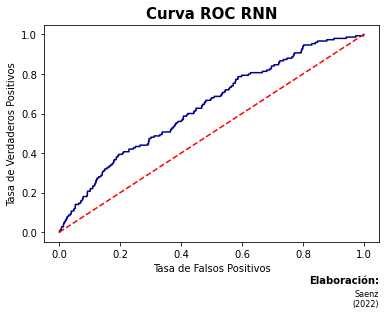

In [101]:
RNN_roc_auc = roc_auc_score(y_test, pred_RNN.iloc[:,0])
FP, VP, umbral = roc_curve(y_test, pred_RNN.iloc[:,0])
fig, ax = plt.subplots()
ax.plot(FP, VP, color = "darkblue")
ax.plot([0,1], [0,1], linestyle = "--", color = "red")
ax.set_xlabel("Tasa de Falsos Positivos")
ax.set_ylabel("Tasa de Verdaderos Positivos")
ax.set_title("Curva ROC RNN", fontweight = "bold", size = 15)
fig.text(.9,-.02, "Elaboración:", fontsize = 10, fontweight = "bold",
         ha = "right")
fig.text(.9,-.1, "Saenz\n(2022)", fontsize = 8, ha = "right")
plt.show()

### Comparación de modelos

In [116]:
score_1NN = model.evaluate(X_test_scaled, y_test)[1]
score_2NN = model_RNN.evaluate(X_test_scaled, y_test)[1]

65/65 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.9275


In [117]:
score_lr, score_rf, score_knn, score_svm, score_1NN, score_2NN

(0.9264990328820116,
 0.9269825918762089,
 0.9260154738878144,
 0.9274661508704062,
 0.9274661540985107,
 0.9274661540985107)

In [118]:
# Por precisión es mejor la red neuronal, cualquiera de las dos. Seguido de el Support Vector Machine y de tercero el Random Forest.

In [133]:
prob_incum_logistic['Grupo_de_Riesgo'].value_counts().sort_index()

T1     21
T2     13
T3     77
T4    159
T5    701
T6    863
T7    232
T8      2
Name: Grupo_de_Riesgo, dtype: int64

In [134]:
prob_incum_rf['Grupo_de_Riesgo'].value_counts().sort_index()

T1    106
T2     58
T3    188
T4    208
T5    413
T6    643
T7    351
T8     18
Name: Grupo_de_Riesgo, dtype: int64

In [135]:
prob_incum_knn['Grupo_de_Riesgo'].value_counts().sort_index()

T1      0
T2      0
T3      0
T4      0
T5    664
T6    389
T7    196
T8     45
Name: Grupo_de_Riesgo, dtype: int64

In [136]:
prob_incum_svm['Grupo_de_Riesgo'].value_counts().sort_index()

T1       0
T2       0
T3       0
T4       8
T5     382
T6    1651
T7      24
T8       3
Name: Grupo_de_Riesgo, dtype: int64

In [137]:
pred_NN['Grupo_de_Riesgo'].value_counts().sort_index()

T1     46
T2     44
T3    121
T4    247
T5    650
T6    639
T7    320
T8      1
Name: Grupo_de_Riesgo, dtype: int64

In [138]:
pred_RNN['Grupo_de_Riesgo'].value_counts().sort_index()

T1    147
T2     51
T3    181
T4    179
T5    493
T6    681
T7    306
T8     30
Name: Grupo_de_Riesgo, dtype: int64

Los modelos de KNN y SVM quedan excluidos porque no clasificaron en todos los grupos de riesgos. Se escoge la segunda red neuronal ya que presentó una precisión alta y además se estimó teniendo en cuenta una amplia grilla de parámetros y también penalización por Dropout.

In [145]:
pred_RNN.rename(columns = {0:'Probabilidad', 'Grupo_de_Riesgo':'grupo_riesgo'}, inplace = True)
pred_RNN

,Probabilidad,grupo_riesgo
0,0.012242,T2
1,0.005595,T1
2,0.046706,T5
3,0.209376,T7
4,0.176444,T7
...,...,...
2063,0.022468,T3
2064,0.019525,T3
2065,0.192464,T7
2066,0.071691,T5


In [ ]:
num_doc_prueba = pd.DataFrame(num_doc_prueba)
num_doc_prueba

In [ ]:
pred_grupo_riesgo_valid = pd.concat([num_doc_prueba, pred_RNN], axis=1)
pred_grupo_riesgo_valid

In [151]:
pred_grupo_riesgo_valid.to_csv('pred_grupo_riesgo_valid.csv', index=False)

## Análisis para el conjunto de prueba

In [ ]:
base_prueba = pd.read_csv('base_prueba.csv', sep ='|')
base_prueba

In [157]:
base_prueba = base_prueba.loc[(base_prueba['tipo_cliente']=='objetivo')]
num_doc_prueba2 = base_prueba['num_doc']
base_prueba = base_prueba.drop(['num_doc', 'f_analisis', 'tipo_cliente'], axis=1)
base_prueba

,trx39,trx102,trx106,trx143,trx158,disp309,CO01END010RO,CO01ACP017CC,CO02EXP011TO,CO02EXP004TO,...,CO01END086RO,CO01END094RO,CO02NUM086AH,CO02NUM043RO,CO01EXP002AH,CO01NUM002AH,CO01END051RO,CO01ACP011RO,CO02MOR092TO,CO01MOR098RO
0,0.986013,0.000000,0.000022,0.140096,0.461207,7.0,-1.00,39.0,100.00,15.0,...,-1.00,-1.00,25.00,-1.0,15.0,1.0,-1.00,-1.0,100.0,-1.0
3,0.372678,0.000000,0.000005,0.000000,0.069334,7.0,1.05,-1.0,66.67,10.0,...,34.82,2.42,66.67,0.0,11.0,2.0,1.92,-2.0,-3.0,-3.0
4,1.089725,0.000000,0.000000,0.186817,0.118401,11.0,-2.00,-2.0,75.00,10.0,...,-3.00,-2.00,50.00,100.0,10.0,2.0,-3.00,0.0,100.0,-3.0
5,0.000000,0.000000,0.000000,0.026700,0.000000,6.0,0.33,-2.0,100.00,0.0,...,92.62,2.54,33.33,50.0,0.0,4.0,2.68,0.0,100.0,-3.0
7,1.280191,0.000000,0.000001,0.382554,0.196148,12.0,-1.00,61.0,100.00,8.0,...,-1.00,-1.00,50.00,-1.0,11.0,1.0,-1.00,-1.0,-3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,3.578485,0.000006,0.000000,0.553695,0.130235,8.0,-1.00,39.0,33.33,2.0,...,-1.00,-1.00,50.00,-1.0,2.0,5.0,-1.00,-1.0,0.0,-1.0
5874,0.276385,0.000000,0.000000,0.017689,0.004267,11.0,-1.00,-2.0,100.00,2.0,...,-1.00,-1.00,33.33,-1.0,2.0,1.0,-1.00,-1.0,-3.0,-1.0
5882,0.276385,0.000001,0.000000,0.000000,0.021334,12.0,-1.00,-1.0,-4.00,96.0,...,-1.00,-1.00,-1.00,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0
5886,0.372678,0.000028,0.000032,0.000000,0.020488,8.0,-1.00,8.0,66.67,2.0,...,-1.00,-1.00,66.67,-1.0,2.0,2.0,-1.00,-1.0,-3.0,-1.0


In [163]:
# Escalar variables
scaler = StandardScaler()
base_prueba_scaled = scaler.fit_transform(base_prueba)
print(base_prueba_scaled)

[[ 0.47862748 -0.11093923 -0.12743426 ... -0.38659358  0.70165659
  -0.78981634]
 [-0.2318512  -0.11093923 -0.12776231 ... -1.12053689 -1.57748366
  -0.83143071]
 [ 0.59876537 -0.11093923 -0.12786325 ...  0.34734974  0.70165659
  -0.83143071]
 ...
 [-0.34339512 -0.11091878 -0.12786325 ... -0.38659358 -1.53322851
  -0.78981634]
 [-0.2318512  -0.11046894 -0.12723238 ... -0.38659358 -1.57748366
  -0.78981634]
 [-0.66355593 -0.11083699 -0.12776231 ... -1.12053689  0.70165659
  -0.81062352]]


In [164]:
pd.DataFrame(base_prueba_scaled)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.478627,-0.110939,-0.127434,0.219555,1.983358,0.082047,-0.508765,0.865011,0.668663,0.900077,...,-0.734984,-0.514134,-0.661756,-0.768903,0.385724,-0.899672,-0.332481,-0.386594,0.701657,-0.789816
1,-0.231851,-0.110939,-0.127762,-0.430960,-0.105325,0.082047,0.116568,-0.524592,-0.684393,0.466085,...,0.162886,-0.101167,0.964219,-0.740463,0.143285,-0.102483,0.002078,-1.120537,-1.577484,-0.831431
2,0.598765,-0.110939,-0.127863,0.436499,0.156203,1.219283,-0.813806,-0.559332,-0.346231,0.466085,...,-0.785116,-0.634884,0.313751,2.103616,0.082675,-0.102483,-0.561632,0.347350,0.701657,-0.831431
3,-0.663556,-0.110939,-0.127863,-0.306981,-0.474875,-0.202262,-0.103061,-0.559332,0.668663,-0.401900,...,1.611711,-0.086677,-0.336717,0.681577,-0.523424,1.491896,0.089155,0.347350,0.701657,-0.831431
4,0.819399,-0.110939,-0.127838,1.345379,0.570593,1.503592,-0.508765,1.629292,0.668663,0.292488,...,-0.734984,-0.514134,0.313751,-0.768903,0.143285,-0.899672,-0.332481,-0.386594,-1.577484,-0.789816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,3.481709,-0.110837,-0.127863,2.140046,0.219279,0.366356,-0.508765,0.865011,-2.037855,-0.228303,...,-0.734984,-0.514134,0.313751,-0.768903,-0.402204,2.289085,-0.332481,-0.386594,-1.511101,-0.789816
2633,-0.343395,-0.110939,-0.127863,-0.348824,-0.452133,1.219283,-0.508765,-0.559332,0.668663,-0.228303,...,-0.734984,-0.514134,-0.336717,-0.768903,-0.402204,-0.899672,-0.332481,-0.386594,-1.577484,-0.789816
2634,-0.343395,-0.110919,-0.127863,-0.430960,-0.361167,1.503592,-0.508765,-0.524592,-3.553295,7.930753,...,-0.734984,-0.514134,-1.676282,-0.768903,-0.584034,-2.494050,-0.332481,-0.386594,-1.533229,-0.789816
2635,-0.231851,-0.110469,-0.127232,-0.430960,-0.365672,0.366356,-0.508765,-0.211932,-0.684393,-0.228303,...,-0.734984,-0.514134,0.964219,-0.768903,-0.402204,-0.102483,-0.332481,-0.386594,-1.577484,-0.789816


In [159]:
model_RNN # Se usa este modelo ya que fue el que obtuvo mejor ajuste y precisión

In [179]:
bins = [0, 0.010, 0.015, 0.030, 0.045, 0.080, 0.150, 0.300, 1.0]
names = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8"]

In [180]:
pred_RNN_prueba = model_RNN.predict(base_prueba_scaled)
pred_RNN_prueba = pd.DataFrame(pred_RNN_prueba)
pred_RNN_prueba['grupo_riesgo'] = pd.cut(pred_RNN_prueba[0], bins, labels = names)
pred_RNN_prueba['grupo_riesgo'].value_counts().sort_index()

T1    179
T2     72
T3    210
T4    251
T5    643
T6    793
T7    450
T8     39
Name: grupo_riesgo, dtype: int64

In [ ]:
## Estos son los resultados de la segunda red neuronal por grupo de riesgo, aplicado al conjunto de prueba

In [184]:
pred_RNN_prueba.rename(columns = {0:'Probabilidad'}, inplace = True)
pred_RNN_prueba

,Probabilidad,grupo_riesgo
0,0.053153,T5
1,0.121271,T6
2,0.171619,T7
3,0.126942,T6
4,0.094827,T6
...,...,...
2632,0.189102,T7
2633,0.123087,T6
2634,0.005106,T1
2635,0.107356,T6


In [ ]:
num_doc_prueba2 = pd.DataFrame(num_doc_prueba2)
num_doc_prueba2 = num_doc_prueba2.reset_index(drop=True)
num_doc_prueba2

In [ ]:
pred_grupo_riesgo_prueba = pd.concat([num_doc_prueba2, pred_RNN_prueba], axis=1)
pred_grupo_riesgo_prueba

In [189]:
pred_grupo_riesgo_prueba.to_csv('pred_grupo_riesgo_prueba.csv', index=False)